## Import Data


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:

# Load data
data = pd.read_csv("DukuhKupang.csv")
print("Data awal:")
print(data.info())

drop_cols = ['Datetime','Timezone','AQI CN','AQI US','HCHO (ppb)','TVOC (ppb)','Temperature (Fahrenheit)','Temperature (Celsius)','Humidity (%)']
data = data.drop(columns=drop_cols)

Data awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40043 entries, 0 to 40042
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timezone                  40043 non-null  object 
 1   Datetime                  40043 non-null  object 
 2   AQI US                    40043 non-null  int64  
 3   AQI CN                    40043 non-null  int64  
 4   PM2.5 (ug/m3)             40043 non-null  float64
 5   PM10 (ug/m3)              40043 non-null  int64  
 6   CO2 (ppm)                 40043 non-null  int64  
 7   Temperature (Celsius)     40043 non-null  float64
 8   Temperature (Fahrenheit)  40043 non-null  float64
 9   Humidity (%)              40043 non-null  int64  
 10  HCHO (ppb)                0 non-null      float64
 11  TVOC (ppb)                0 non-null      float64
dtypes: float64(5), int64(5), object(2)
memory usage: 3.7+ MB
None


In [124]:
print(data.isna().sum())
print(data.isnull().sum())
print(data.duplicated().sum())

PM2.5 (ug/m3)    0
PM10 (ug/m3)     0
CO2 (ppm)        0
dtype: int64
PM2.5 (ug/m3)    0
PM10 (ug/m3)     0
CO2 (ppm)        0
dtype: int64
7555


In [125]:
data = data.dropna()
data = data.drop_duplicates()
data.duplicated().sum()

0

In [126]:
# Hapus missing values & duplicate
data = data.dropna().drop_duplicates()
print("Data setelah drop NA & duplicate:", data.shape)

Data setelah drop NA & duplicate: (32488, 3)


In [127]:
data.describe(

)

,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm)
count,32488.000000,32488.000000,32488.000000
mean,43.098187,83.755233,432.853700
std,35.805770,71.365823,22.364078
min,3.000000,3.000000,390.000000
25%,21.000000,40.000000,418.000000
50%,34.000000,63.000000,428.000000
75%,55.000000,103.000000,443.000000
max,1798.800000,2000.000000,628.000000


In [128]:
## cek data Oulier

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = data[(data < lower_bound) | (data > upper_bound)].dropna(how='all').index
print(f"Number of potential outliers detected: {len(outlier_indices)}")

Number of potential outliers detected: 3091


In [129]:
## Hapus data Oulier
data_cleaned_looped = data.copy() # Create a copy to avoid modifying the original data

while True:
    Q1 = data_cleaned_looped.quantile(0.25)
    Q3 = data_cleaned_looped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned_looped[(data_cleaned_looped < lower_bound) | (data_cleaned_looped > upper_bound)].dropna(how='all').index

    if len(outlier_indices) == 0:
        print("No more outliers detected.")
        break
    else:
        print(f"Removing {len(outlier_indices)} potential outliers.")
        data_cleaned_looped = data_cleaned_looped.drop(outlier_indices)

print(f"Number of rows after removing outliers iteratively: {len(data_cleaned_looped)}")
display(data_cleaned_looped.head())

Removing 3091 potential outliers.
Removing 1489 potential outliers.
Removing 838 potential outliers.
Removing 495 potential outliers.
Removing 207 potential outliers.
Removing 77 potential outliers.
No more outliers detected.
Number of rows after removing outliers iteratively: 26291


,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm)
0,21.0,35,430
1,17.0,37,430
2,19.0,32,428
3,18.0,31,428
4,19.0,40,427


In [130]:
data_cleaned_looped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26291 entries, 0 to 40042
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PM2.5 (ug/m3)  26291 non-null  float64
 1   PM10 (ug/m3)   26291 non-null  int64  
 2   CO2 (ppm)      26291 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 821.6 KB


<Axes: >

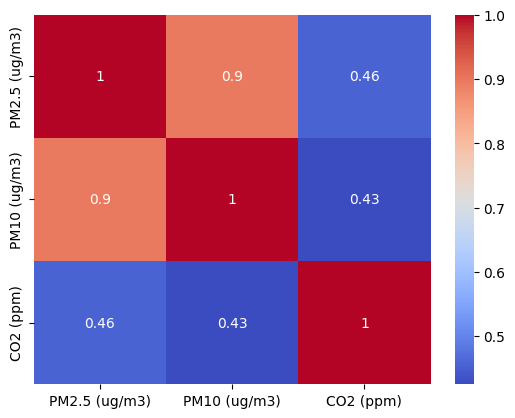

In [131]:
## Heatmap Data
import seaborn as sns
sns.heatmap(data_cleaned_looped.corr(), annot=True, cmap='coolwarm')

# Prepocessing

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X = data_cleaned_looped.copy()

# Split sebelum apa pun!
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=None)

In [133]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_test)         # HANYA TRANSFORM, TIDAK FIT

Clustering progress:  11%|█         | 1/9 [00:04<00:32,  4.11s/it]

k=2, Silhouette Score=0.4423


Clustering progress:  22%|██▏       | 2/9 [00:07<00:27,  3.86s/it]

k=3, Silhouette Score=0.3334


Clustering progress:  33%|███▎      | 3/9 [00:11<00:22,  3.73s/it]

k=4, Silhouette Score=0.3440


Clustering progress:  44%|████▍     | 4/9 [00:15<00:18,  3.72s/it]

k=5, Silhouette Score=0.3149


Clustering progress:  56%|█████▌    | 5/9 [00:19<00:15,  3.86s/it]

k=6, Silhouette Score=0.3052


Clustering progress:  67%|██████▋   | 6/9 [00:22<00:11,  3.80s/it]

k=7, Silhouette Score=0.2880


Clustering progress:  78%|███████▊  | 7/9 [00:26<00:07,  3.83s/it]

k=8, Silhouette Score=0.2872


Clustering progress:  89%|████████▉ | 8/9 [00:30<00:03,  3.92s/it]

k=9, Silhouette Score=0.2834


Clustering progress: 100%|██████████| 9/9 [00:34<00:00,  3.88s/it]

k=10, Silhouette Score=0.2819


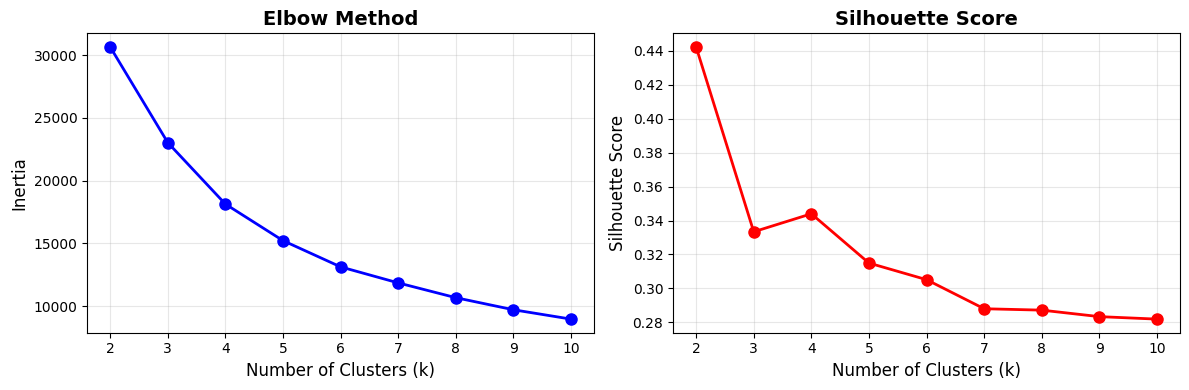

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

inertias = []
sil_scores = []
K_range = range(2, 11)

# Loop untuk setiap nilai k
for k in tqdm(K_range, desc="Clustering progress"):
    # Latih K-Means pada data yang sudah di-scale
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_train_scaled)
    
    # Simpan inertia
    inertias.append(kmeans_temp.inertia_)
    
    # Hitung Silhouette Score pada data yang SAMA (X_train_scaled)
    sil_score = silhouette_score(X_train_scaled, labels_temp)
    sil_scores.append(sil_score)
    
    # Print hasil untuk setiap k
    print(f"k={k}, Silhouette Score={sil_score:.4f}")

# Plot hasil
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot Elbow Method
ax[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[0].set_ylabel('Inertia', fontsize=12)
ax[0].grid(True, alpha=0.3)

# Plot Silhouette Score
ax[1].plot(K_range, sil_scores, 'ro-', linewidth=2, markersize=8)
ax[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[1].set_ylabel('Silhouette Score', fontsize=12)
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [135]:
# === 5. Pilih jumlah cluster, misal k=3 ===
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_scaled) # HANYA FIT PADA TRAIN

KMeans(n_clusters=2, n_init=10, random_state=42)

In [136]:
# Assign cluster ke Train & Test
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)   # HANYA PREDICT, TIDAK FIT

         PM2.5 (ug/m3)  PM10 (ug/m3)   CO2 (ppm)
Cluster                                         
0            47.699707     89.323286  436.041969
1            21.413167     40.772192  419.615385


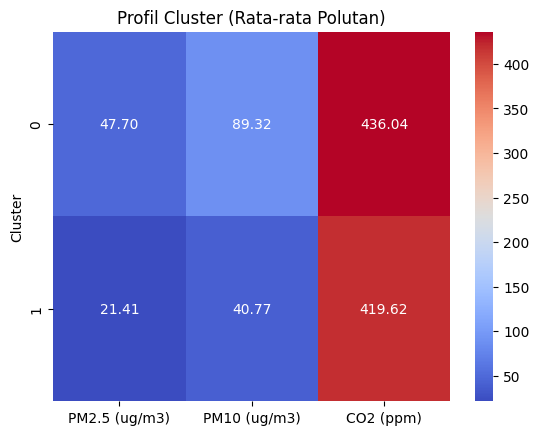

In [137]:
# Tambahkan ke dataframe
X_train["Cluster"] = train_clusters
X_test["Cluster"] = test_clusters

# === 6. Profil cluster ===
cluster_profile = X_train.groupby("Cluster").mean()
print(cluster_profile)

sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster (Rata-rata Polutan)")
plt.show()

In [138]:
# === 1. Jumlah data per cluster ===
print("Jumlah data per cluster:")
print(pd.Series(train_clusters).value_counts())

Jumlah data per cluster:
1    13169
0     7863
Name: count, dtype: int64


In [114]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import seaborn as sns
# # === 2. Scatterplot cluster (PCA 2D) ===
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_train_scaled)

# plt.figure(figsize=(8,6))
# sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train_clusters, palette="Set1", s=15)
# plt.title("Visualisasi Cluster (PCA 2D)")
# plt.show()

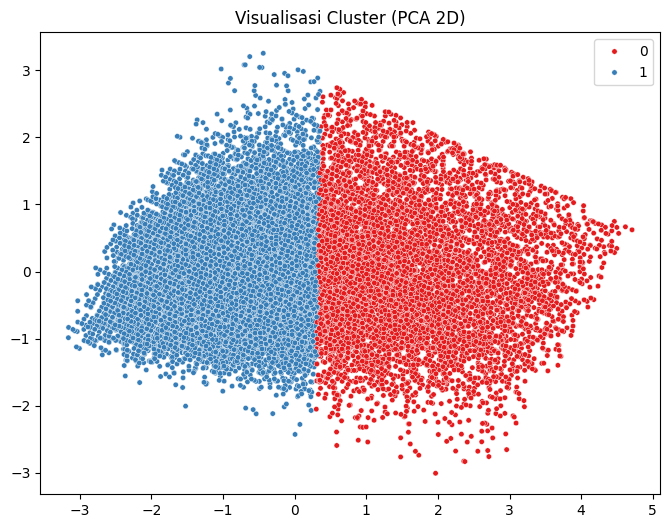

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# === 2. Scatterplot cluster (PCA 2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train_clusters, palette="Set1", s=15)
plt.title("Visualisasi Cluster (PCA 2D)")
plt.show()

In [140]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance
# Silhouette Score: Higher value means better defined clusters (range -1 to 1)
silhouette_avg = silhouette_score(X_train_scaled, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index: Lower value means better clustering (0 indicates perfect separation)
db_index = davies_bouldin_score(X_train_scaled, train_clusters)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.4423133354333152
Davies-Bouldin Index: 0.8848245100667227


In [141]:
# --- Fungsi AQI ---
import numpy as np

# Tabel breakpoints (Bmin, Bmax, Imin, Imax)
breakpoints = {
    "PM2.5": [(0, 30, 0, 50),
              (31, 60, 51, 100),
              (61, 90, 101, 200),
              (91, 120, 201, 300),
              (121, 250, 301, 400)],
    
    "PM10": [(0, 50, 0, 50),
             (51, 100, 51, 100),
             (101, 250, 101, 200),
             (251, 350, 201, 300),
             (351, 430, 301, 400)],
    
    # Sementara pakai kategori CO (mg/m3) diadaptasi ke ppm (contoh kasar)
    "CO2": [(0, 1000, 0, 50),
            (1001, 2000, 51, 100),
            (2001, 5000, 101, 200),
            (5001, 10000, 201, 300),
            (10001, 20000, 301, 400)]
}

def calculate_sub_index(pollutant, concentration):
    for (Bmin, Bmax, Imin, Imax) in breakpoints[pollutant]:
        if Bmin <= concentration <= Bmax:
            return ((Imax - Imin) / (Bmax - Bmin)) * (concentration - Bmin) + Imin
    return np.nan
def calculate_aqi_linear(row):
    sub_pm25 = calculate_sub_index("PM2.5", row["PM2.5 (ug/m3)"])
    sub_pm10 = calculate_sub_index("PM10", row["PM10 (ug/m3)"])
    sub_co2  = calculate_sub_index("CO2", row["CO2 (ppm)"])
    
    return max(sub_pm25, sub_pm10, sub_co2)

def categorize_aqi(value):
    if value <= 50: return "Good"
    elif value <= 100: return "Satisfactory"
    elif value <= 200: return "Moderate"
    elif value <= 300: return "Poor"
    elif value <= 400: return "Very Poor"
    else: return "Severe"
    
X_train["AQI_Value"] = X_train.apply(calculate_aqi_linear, axis=1)
X_train["AQI_Category"] = X_train["AQI_Value"].apply(categorize_aqi)



AQI_Category  Good  Moderate  Satisfactory  Severe
Cluster                                           
0               58      2439          5237     129
1             8894         7          4268       0


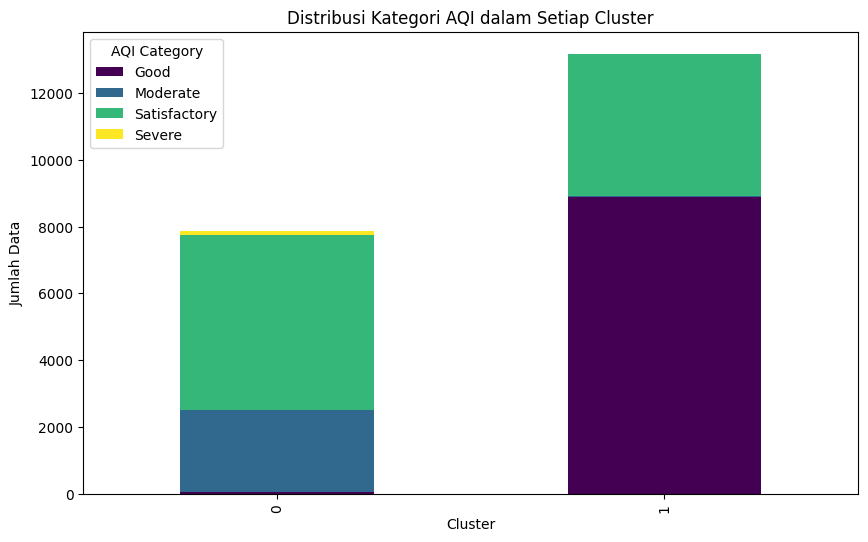

In [142]:
# Crosstab cluster vs AQI Category
cluster_summary = pd.crosstab(X_train["Cluster"], X_train["AQI_Category"])
print(cluster_summary)

# Plot stacked bar
cluster_summary.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Distribusi Kategori AQI dalam Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.legend(title="AQI Category")
plt.show()


In [143]:
# Gabungkan kembali train dan test yang sudah di-scale
import numpy as np

X_final = np.vstack([X_train_scaled, X_test_scaled])  # Gabung array
y_final = np.hstack([train_clusters, test_clusters])   # Gabung label cluster

In [144]:

# === 3. Siapkan data untuk klasifikasi ===

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)



=== Random Forest ===
Accuracy: 0.995436394751854
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1964
           1       1.00      1.00      1.00      3295

    accuracy                           1.00      5259
   macro avg       1.00      1.00      1.00      5259
weighted avg       1.00      1.00      1.00      5259



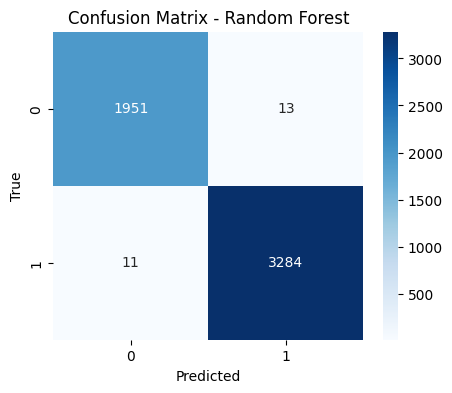


=== SVM ===
Accuracy: 0.998478798250618
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1964
           1       1.00      1.00      1.00      3295

    accuracy                           1.00      5259
   macro avg       1.00      1.00      1.00      5259
weighted avg       1.00      1.00      1.00      5259



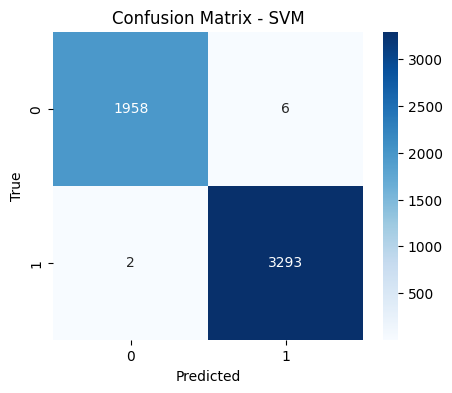


=== KNN ===
Accuracy: 0.996196995626545
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1964
           1       1.00      1.00      1.00      3295

    accuracy                           1.00      5259
   macro avg       1.00      1.00      1.00      5259
weighted avg       1.00      1.00      1.00      5259



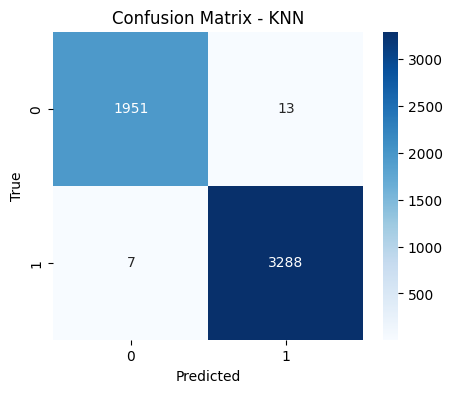


=== Naive Bayes ===
Accuracy: 0.970907016543069
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1964
           1       0.98      0.97      0.98      3295

    accuracy                           0.97      5259
   macro avg       0.97      0.97      0.97      5259
weighted avg       0.97      0.97      0.97      5259



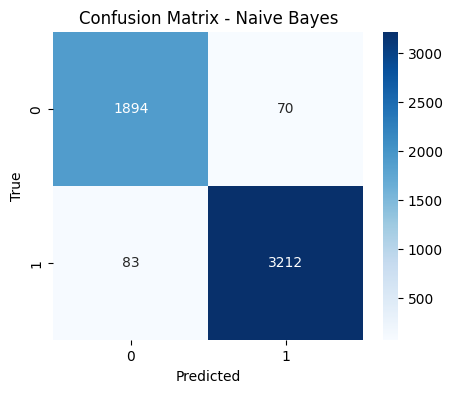


=== Decition Tree ===
Accuracy: 0.9908727895037079
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1964
           1       0.99      0.99      0.99      3295

    accuracy                           0.99      5259
   macro avg       0.99      0.99      0.99      5259
weighted avg       0.99      0.99      0.99      5259



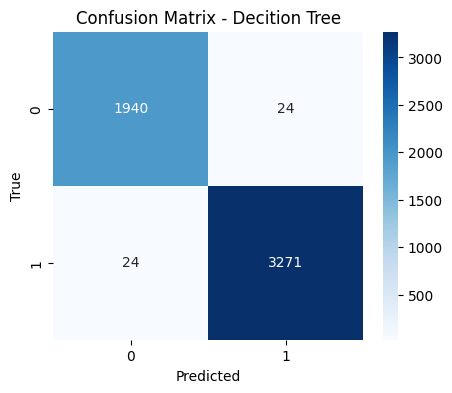

In [145]:
from sklearn.tree import DecisionTreeClassifier
# === 4. Definisi model ===
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decition Tree": DecisionTreeClassifier(random_state=42),
}

# === 5. Training & Evaluasi ===
for name, model in models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test_cls, y_pred))
    print(classification_report(y_test_cls, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test_cls, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()